In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


## Univariatee Analysis

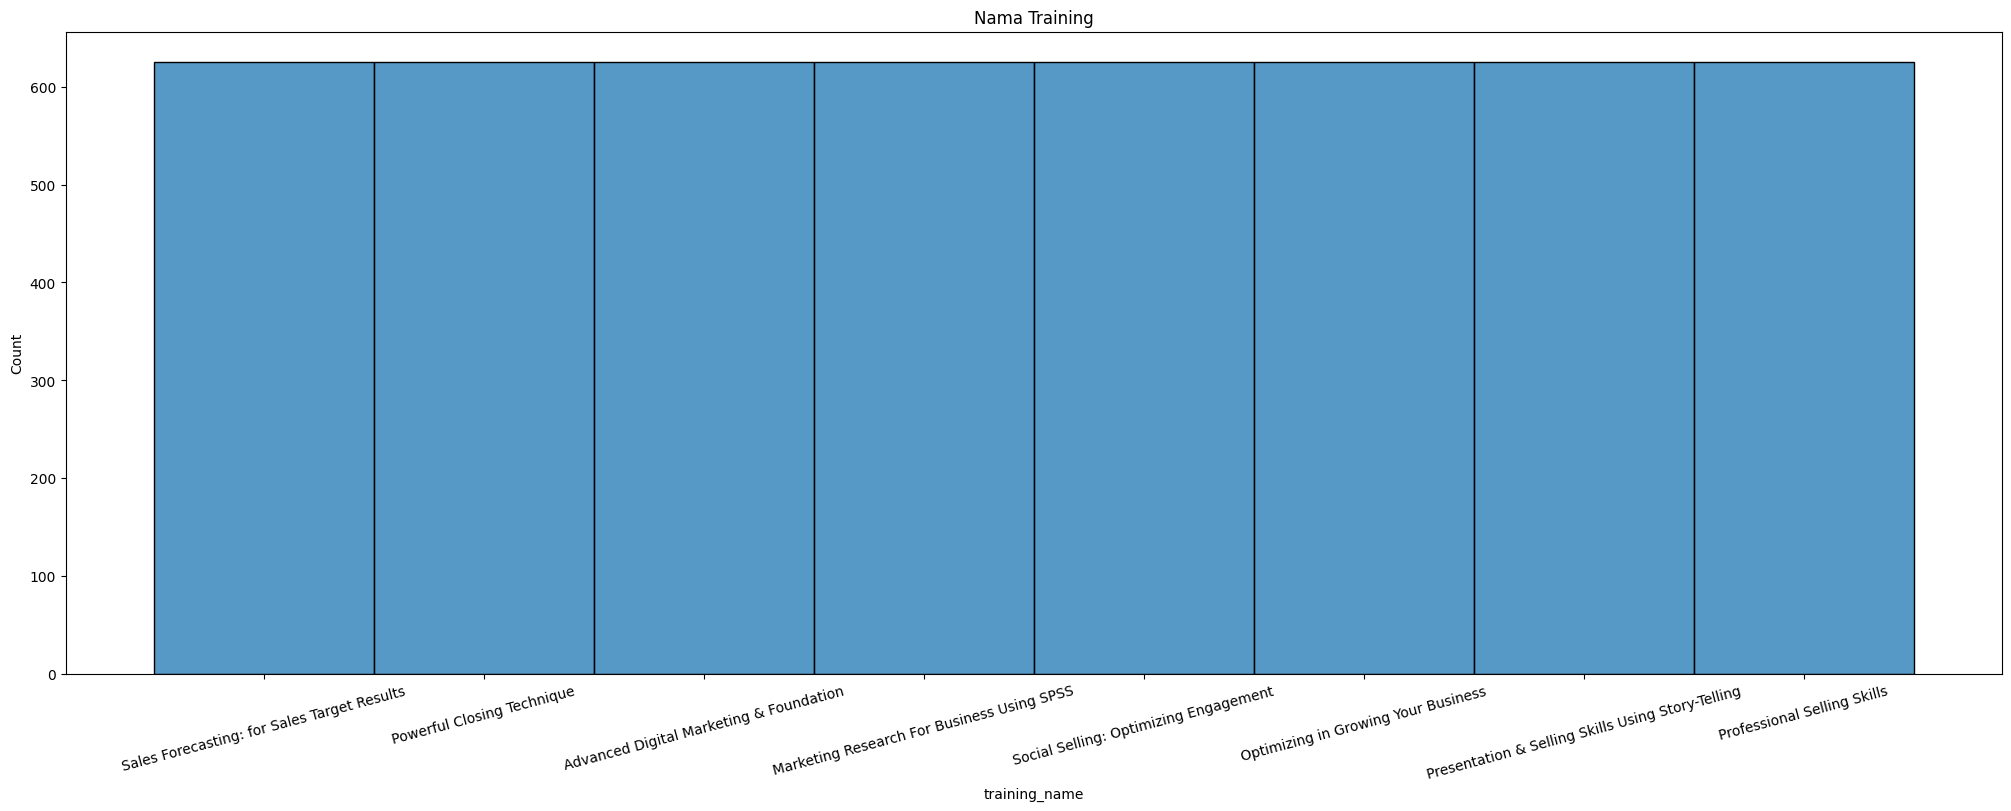

Sales Forecasting: for Sales Target Results          625
Powerful Closing Technique                           625
Advanced Digital Marketing & Foundation              625
Marketing Research For Business Using SPSS           625
Social Selling: Optimizing Engagement                625
Optimizing in Growing Your Business                  625
Presentation & Selling Skills Using Story-Telling    625
Professional Selling Skills                          625
Name: training_name, dtype: int64


In [3]:
# training_name
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["training_name"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_name"].value_counts())

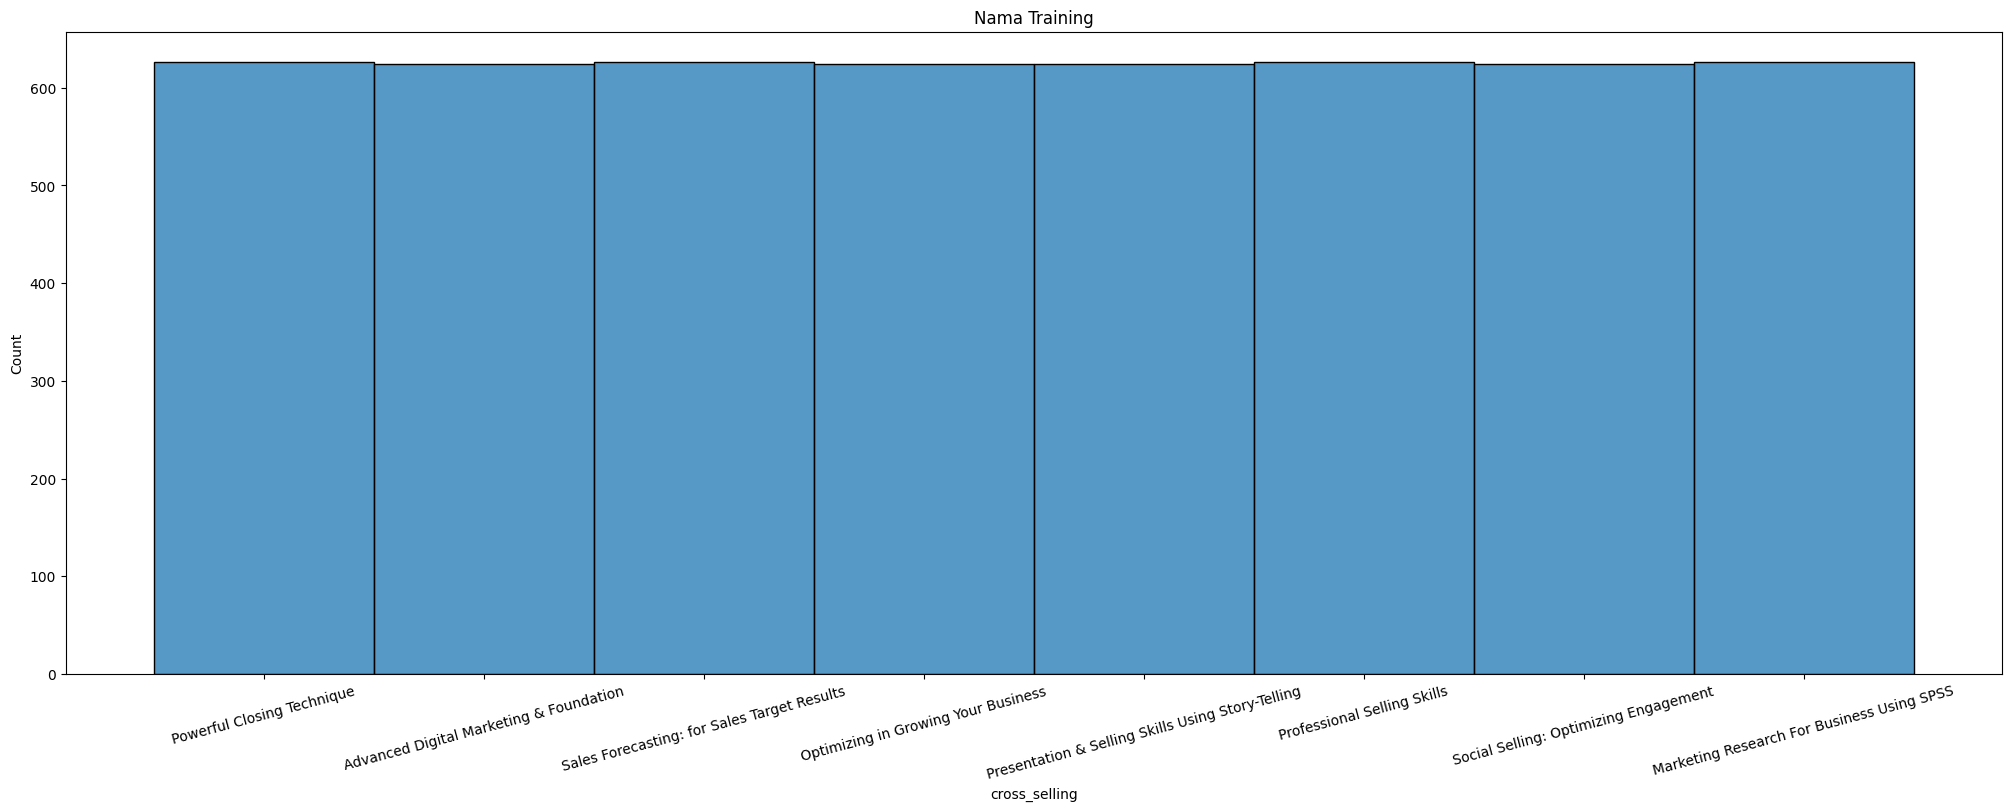

Powerful Closing Technique                           626
Sales Forecasting: for Sales Target Results          626
Professional Selling Skills                          626
Marketing Research For Business Using SPSS           626
Advanced Digital Marketing & Foundation              624
Optimizing in Growing Your Business                  624
Presentation & Selling Skills Using Story-Telling    624
Social Selling: Optimizing Engagement                624
Name: cross_selling, dtype: int64


In [4]:
# Cross Selling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["cross_selling"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["cross_selling"].value_counts())

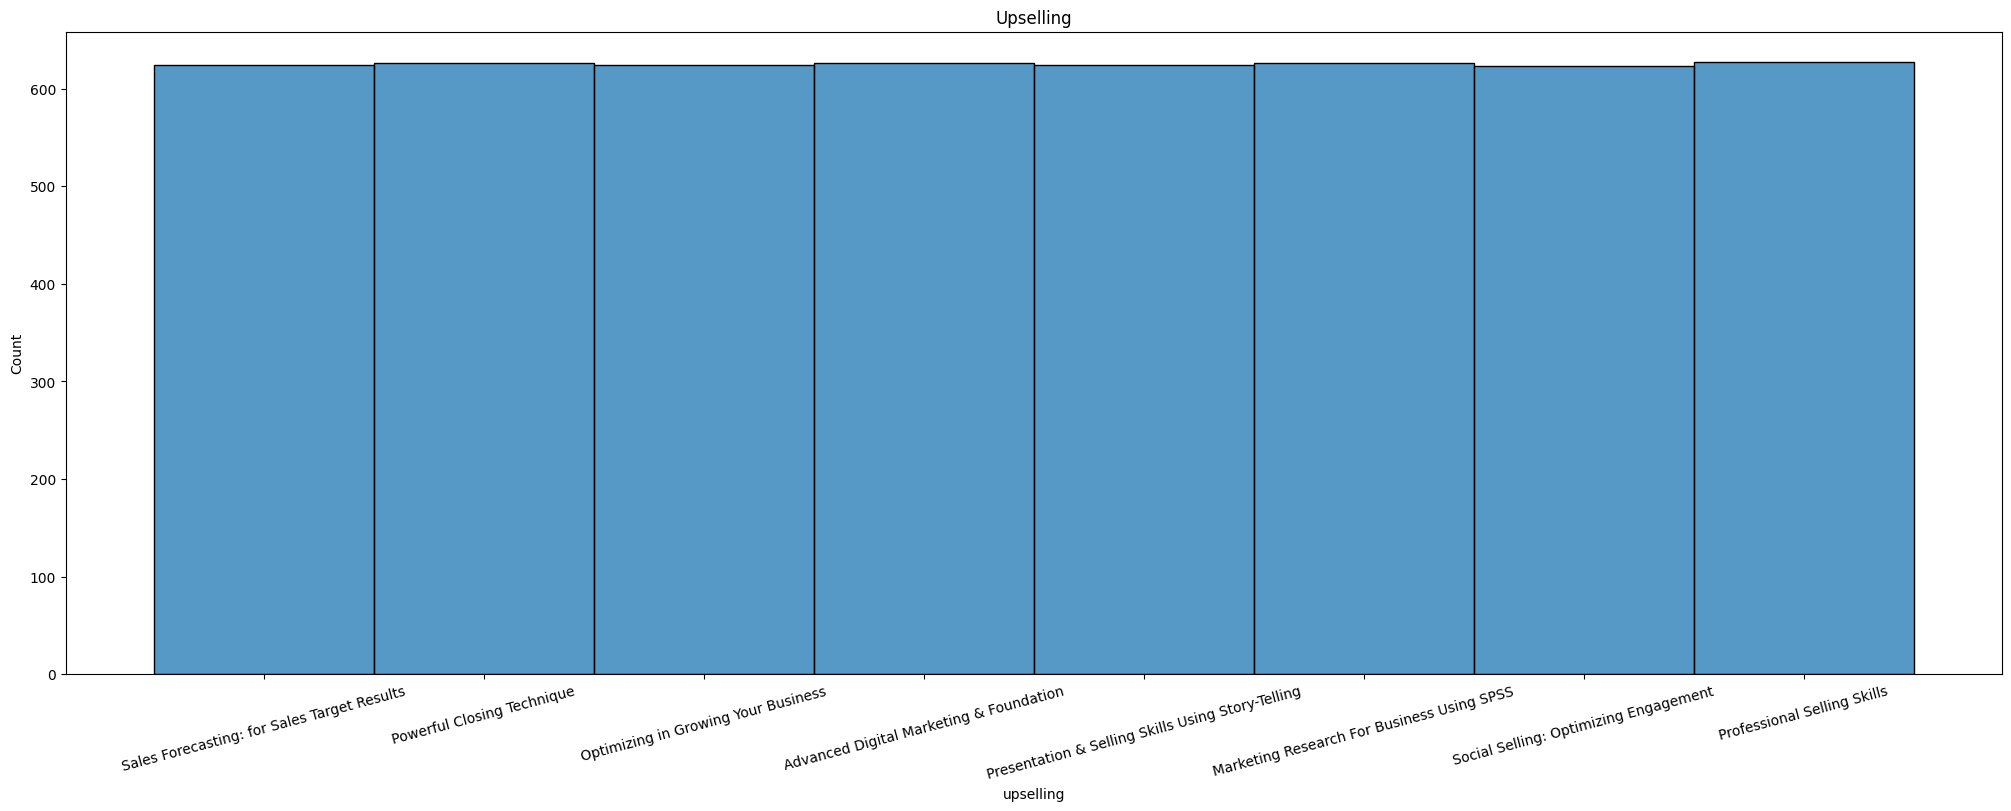

Professional Selling Skills                          627
Powerful Closing Technique                           626
Advanced Digital Marketing & Foundation              626
Marketing Research For Business Using SPSS           626
Sales Forecasting: for Sales Target Results          624
Optimizing in Growing Your Business                  624
Presentation & Selling Skills Using Story-Telling    624
Social Selling: Optimizing Engagement                623
Name: upselling, dtype: int64


In [5]:
# Upselling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["upselling"], ax=ax)
ax.set_title("Upselling")
plt.xticks(rotation=15)
plt.show()
print(df["upselling"].value_counts())

<Axes: >

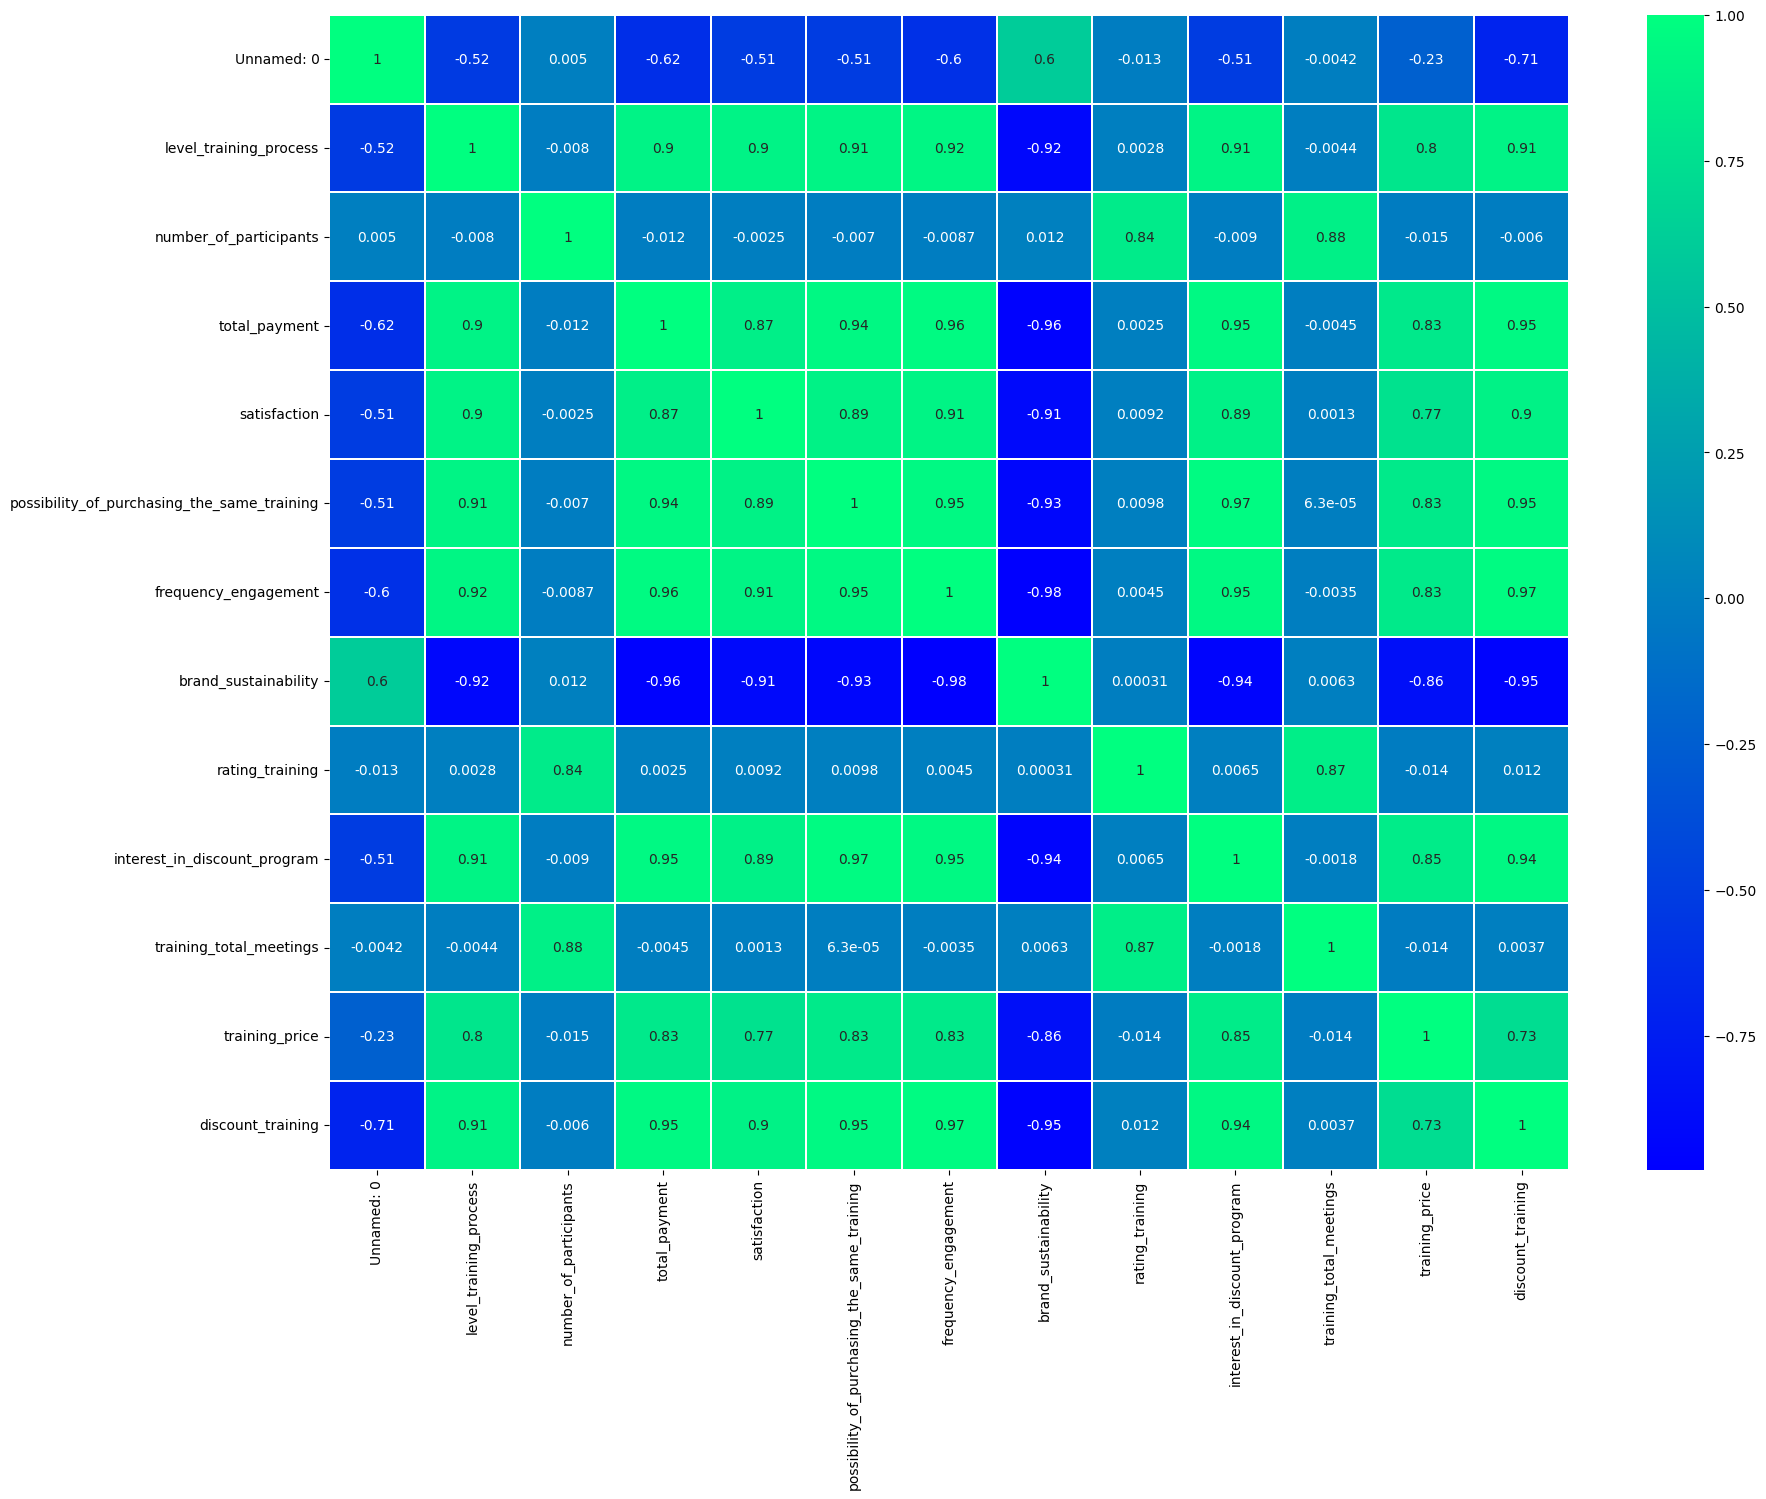

In [6]:
num_columns = [i for i in df.columns if df[i].dtype != "object"]
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df[num_columns].corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)

<Axes: >

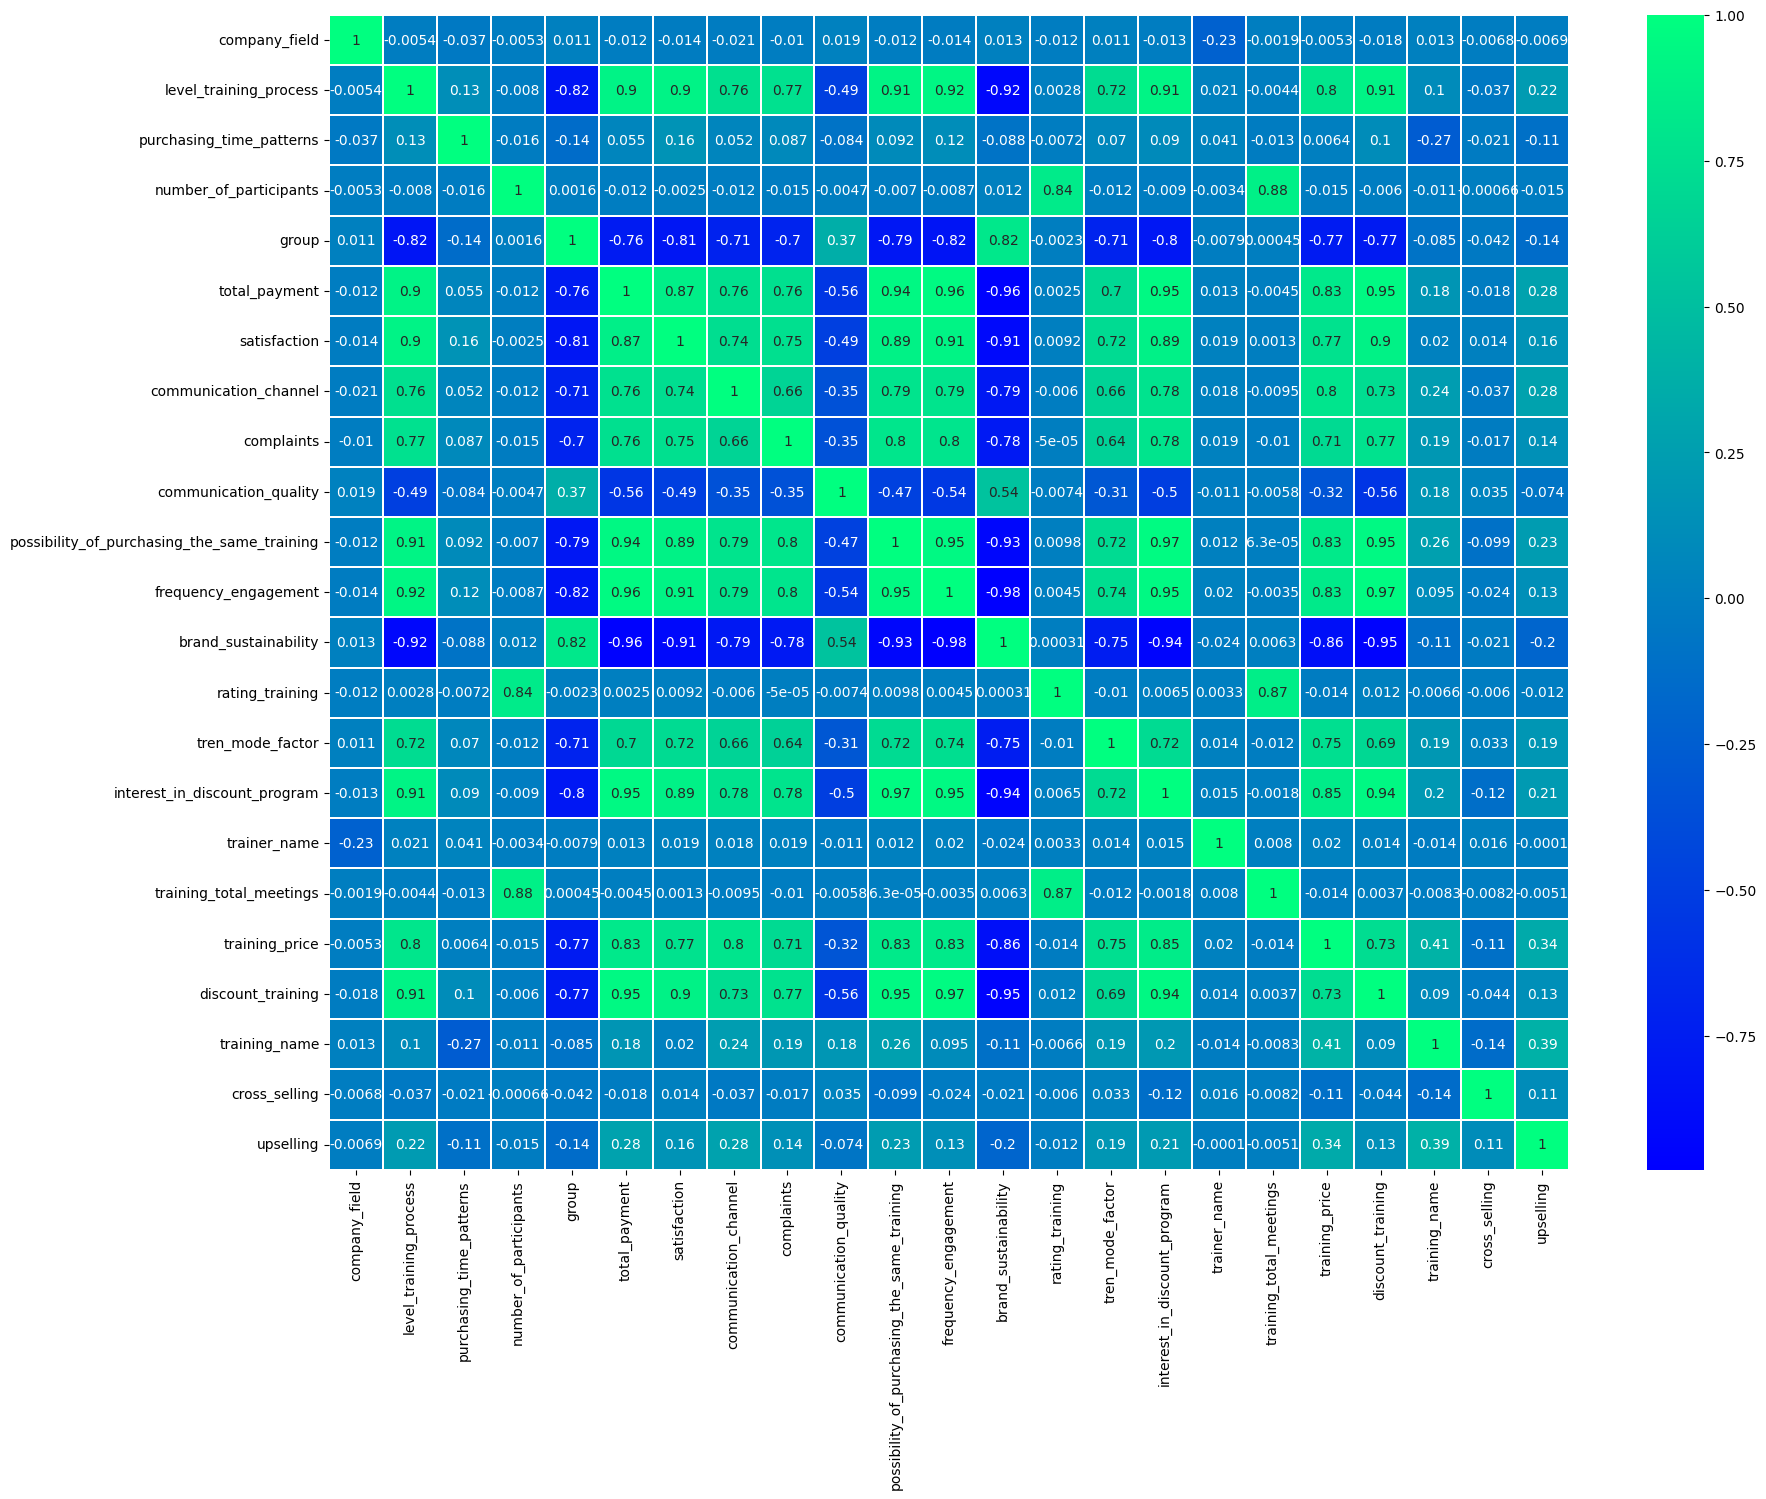

In [7]:
from sklearn.preprocessing import LabelEncoder
# Scaling category variable

columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])

df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_type", "training_ID"
], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_field                                5000 non-null   int32  
 1   level_training_process                       5000 non-null   int64  
 2   purchasing_time_patterns                     5000 non-null   int32  
 3   number_of_participants                       5000 non-null   int64  
 4   group                                        5000 non-null   int32  
 5   total_payment                                5000 non-null   float64
 6   satisfaction                                 5000 non-null   int64  
 7   communication_channel                        5000 non-null   int32  
 8   complaints                                   5000 non-null   int32  
 9   communication_quality                        5000 non-null   int32  
 10  